In [1]:
import sys 
sys.path.append('..')

from targets import Target
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from models import SoftmaxWeight
from models import DIFDensityEstimator
%load_ext autoreload
%autoreload 2

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.6250, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 1.0000, 0.0625, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.9375, 0.2500, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0625,  ..., 0.6250, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.5000,  ..., 0.4375, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.3750,  ..., 0.2500, 0.0000, 0.0000]])
number of training samples182


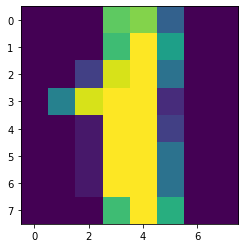

In [20]:
from sklearn.datasets import load_digits
digits = load_digits()
digit = 1

extracted = digits.data[digits.target == digit]
plt.imshow(digits.images[digits.target == digit][0])
target_samples = torch.tensor(extracted).float()
target_samples = (target_samples)/16
print(target_samples)
p = target_samples.shape[1]
num_samples = target_samples.shape[0]

print("number of training samples"  +str(num_samples))
train_set, test_set = target_samples[:120], target_samples[120:]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:47<00:00, 21.16it/s, loss = -131.01600646972656]


ValueError: cannot reindex from a duplicate axis

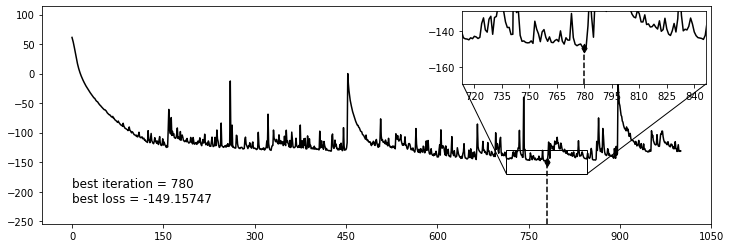

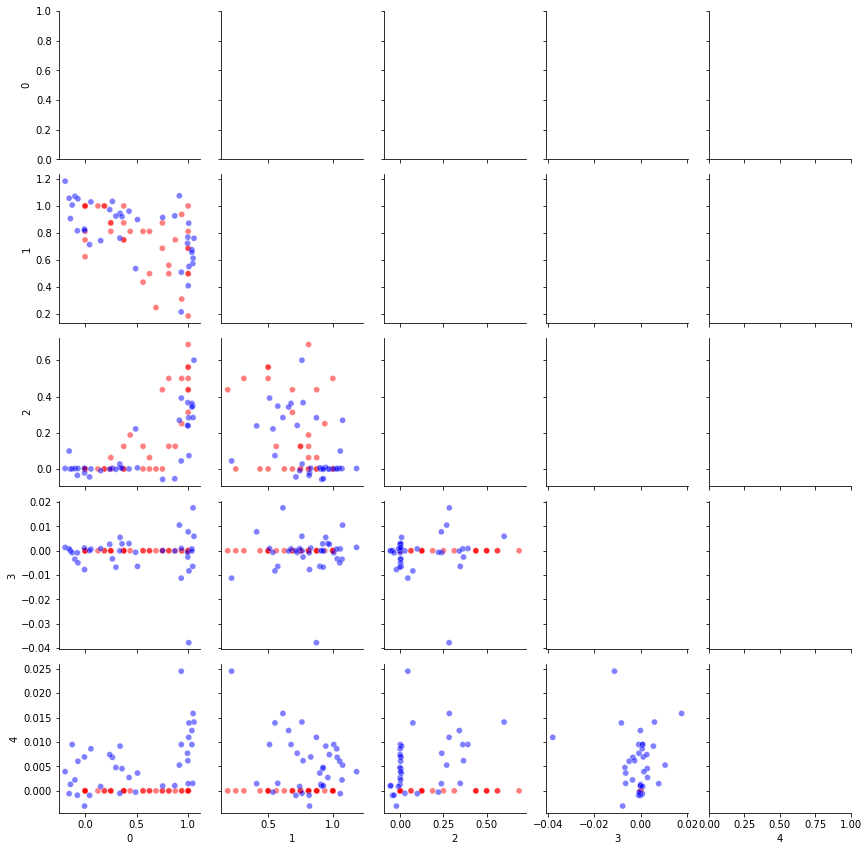

In [21]:
num_samples = target_samples.shape[0]
epochs =1000
batch_size = int(num_samples/12)
initial_w = SoftmaxWeight(50, p,[5,5,5], 'NN')
DIF = DIFDensityEstimator(target_samples, 50, initial_w = initial_w)
DIF.train(epochs, batch_size, visual = True)
DIF.model_visual(num_samples=int(num_samples/5))

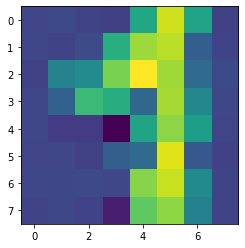

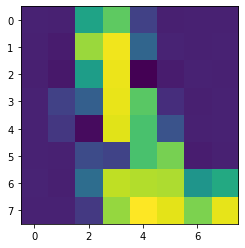

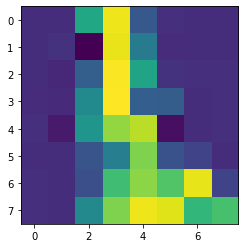

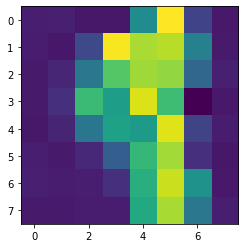

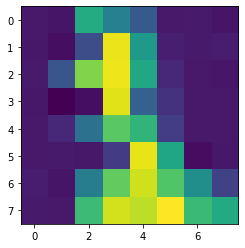

In [22]:
for _ in range(5):
    plt.figure()
    plt.imshow(DIF.sample_model(1).cpu().detach().reshape(8,8))

number of samples = 5958


C:\Users\Elouan\PycharmProjects\Discretely-Indexed-Flows\venv\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: Could not find module 'C:\Users\Elouan\PycharmProjects\Discretely-Indexed-Flows\venv\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


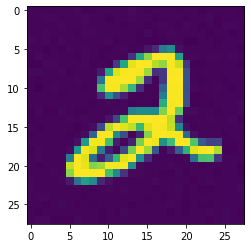

In [2]:
import torchvision
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)
images = mnist_trainset.data.flatten(start_dim=1)
targets = mnist_trainset.targets

digit = 2
if digit != 'all':
    extracted = images[targets == digit] 
else: 
    extracted = images
target_samples = extracted

num_samples  = target_samples.shape[0]
print('number of samples = ' + str(num_samples))
p = target_samples.shape[-1]
plt.imshow(target_samples[0].reshape(28,28))

train_set, test_set = target_samples[:4000], target_samples[4000:]

In [9]:
num_samples = target_samples.shape[0]
epochs =1000
batch_size = int(num_samples/50)
initial_w = SoftmaxWeight(200, p,[5,5,5], 'Constant')
DIF = DIFDensityEstimator(target_samples, 200, initial_w = initial_w)
DIF.train(epochs, batch_size, visual = True)
DIF.model_visual(num_samples=int(num_samples/5))

RuntimeError: CUDA out of memory. Tried to allocate 72.00 MiB (GPU 0; 6.00 GiB total capacity; 4.20 GiB already allocated; 60.44 MiB free; 4.27 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

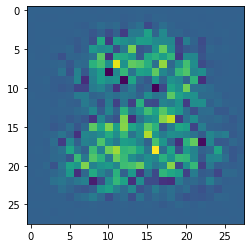

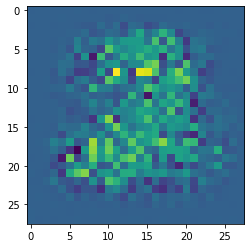

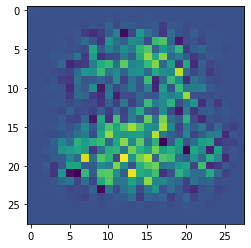

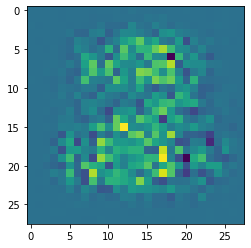

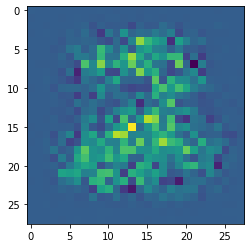

In [7]:
for _ in range(5):
    plt.figure()
    plt.imshow(DIF.sample_model(1).cpu().detach().reshape(28,28))